# Data Preprocessing

说明：  
1） 数据集来源： [(Kaggle)House_Price](https://www.kaggle.com/datasets/juhibhojani/house-price)  
2） Data Preprocessing部分参考：[(Kaggle)House Price:Data Cleaning, EDA & ML Models](https://www.kaggle.com/code/sainitishmitta04/house-price-data-cleaning-eda-ml-models)  
3） 属性仅保留了'Amount(in rupees)', 'Price (in rupees)', 'Carpet Area', 'Bathroom', 'Balcony'五列，  
    分别表示    总房价，单位面积的房价，套内面积，浴室数量，阳台数量  
4） 对于'Price (in rupees)' 和 'Carpet Area'， 如果为空值，则删除该条数据  
5） 对于'Bathroom' 和 'Balcony'，如果值为'>10'，则赋值为11，如果为空值，则赋值为所有房子的平均值  

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/house-prices/house_prices.csv")
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [3]:
# 筛选出 location 为 印度首都新德里 (new-delhi) 的数据
df = df.loc[df['location'] == 'new-delhi']

In [4]:
# 仅保留呈现正/负相关的属性列，其他属性列可能不太存在线性相关的关系
df = df[['Amount(in rupees)', 'Price (in rupees)', 'Carpet Area', 'Bathroom', 'Balcony']]

In [5]:
# 去除重复项
df.drop_duplicates(inplace=True)

In [6]:
house_df = df.copy()

In [7]:
# 把'Amount(in rupees)'列的内容(string)转换为数字形式(float)
# Convert 'Amount(in rupees)' to numerical format
def convert_amount(amount):
    try:
        if 'Lac' in amount:
            amount = amount.replace('Lac', '').strip()
            return float(amount) * 100000  # Convert Lac to rupees (1 Lac = 100000 rupees)
        elif 'Cr' in amount:
            amount = amount.replace('Cr', '').strip()
            return float(amount) * 10000000  # Convert Cr to rupees (1 Cr = 10000000 rupees)
        else:
            return float(amount)
    except ValueError:
        return np.nan

# 把'Carpet Area'列的内容(string)转换为数字形式(float)
# Convert 'Carpet Area' to numerical format
def convert_carpet_area(area):
    try:
        if 'sqft' in area:
            area = area.replace('sqft', '').strip()
            return float(area)  # Convert to square feet (转换为平方英尺)
        elif 'sqm' in area:
            area = area.replace('sqm', '').strip()
            return float(area) * 10.7639  # Convert square meters to square feet (把平方米转换为平方英尺) (1 sqm = 10.7639 sqft)
        else:
            return np.nan
    except ValueError:
        return np.nan

In [8]:
# 把'Amount(in rupees)'和 'Carpet Area'列的内容(string)转换为数字形式(float)
# Convert 'Amount(in rupees)' and 'Carpet Area' to numerical format
house_df['Amount(in rupees)'] = house_df['Amount(in rupees)'].astype(str).apply(convert_amount)
house_df['Carpet Area'] = house_df['Carpet Area'].astype(str).apply(convert_carpet_area)

# 如果'Carpet Area' 或 'Price (in rupees)' 列的值为空，则删除该条数据
# Drop rows where 'Carpet Area' or 'Price (in rupees)' is null
house_df = house_df.dropna(subset=['Carpet Area'])
house_df = house_df.dropna(subset=['Price (in rupees)'])

# 查看还有多少“空值”
# Verify if all null values have been handled
print(house_df.isnull().sum())

Amount(in rupees)     0
Price (in rupees)     0
Carpet Area           0
Bathroom              0
Balcony              54
dtype: int64


In [9]:
# 把'Bathroom' 和 'Balcony' 列的内容转换为数值类型
# Convert 'Bathroom' and 'Balcony' columns to numeric form, including '>10'
house_df['Bathroom'] = pd.to_numeric(house_df['Bathroom'], errors='coerce')
house_df['Balcony'] = pd.to_numeric(house_df['Balcony'], errors='coerce')

# 如果'Bathroom' 或 'Balcony' 列的值为 NaN，则填充为各自的平均值
# Fill NaN values in 'Bathroom' and 'Balcony' with the mean of their respective columns
mean_bathroom = house_df['Bathroom'].mean()
mean_balcony = house_df['Balcony'].mean()
house_df['Bathroom'] = house_df['Bathroom'].fillna(mean_bathroom)
house_df['Balcony'] = house_df['Balcony'].fillna(mean_balcony)

# 如果'Bathroom' 或 'Balcony' 列的值为 >10，则赋值为 11
# Convert >10 values in 'Bathroom' and 'Balcony' to their respective numeric forms
house_df.loc[house_df['Bathroom'] == '>10', 'Bathroom'] = 11
house_df['Bathroom'] = house_df['Bathroom'].astype(int)

house_df.loc[house_df['Balcony'] == '>10', 'Balcony'] = 11
house_df['Balcony'] = house_df['Balcony'].astype(int)

# 查看还有多少“空值”
# Verify if all null values have been handled
print(house_df.isnull().sum())

Amount(in rupees)    0
Price (in rupees)    0
Carpet Area          0
Bathroom             0
Balcony              0
dtype: int64


In [10]:
df = house_df.copy()

In [11]:
df.head()

,Amount(in rupees),Price (in rupees),Carpet Area,Bathroom,Balcony
115467,26000000.0,11818.0,2000.0,3,4
115468,2000000.0,18349.0,100.0,1,2
115470,16000000.0,9412.0,1350.0,2,3
115471,35000000.0,19444.0,1450.0,3,3
115472,7000000.0,6364.0,1100.0,3,2


In [12]:
print(df.shape)

(1641, 5)


# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

# 提取特征和目标变量
X = df.drop(columns=['Amount(in rupees)']).values
y = df['Amount(in rupees)'].values

# 标准化特征
X = (X - X.mean(axis=0)) / X.std(axis=0)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3407)

In [14]:
print(X_train.shape)
print(y_train.shape)

(1312, 4)
(1312,)


In [15]:
print(X_test.shape)
print(y_test.shape)

(329, 4)
(329,)


In [16]:
X_train[0:10, :]

array([[-1.11673872, -0.63435284, -0.64379031, -1.05694952],
       [-0.70033782, -0.23485365,  0.41056088,  0.82016538],
       [-0.04327888,  0.7607237 ,  0.41056088,  1.75872283],
       [ 2.40487783,  0.19001057,  0.41056088,  1.75872283],
       [ 0.07354293,  1.3948494 ,  0.41056088,  0.82016538],
       [-0.13892993,  0.50707342,  0.41056088, -0.11839207],
       [ 0.41367806, -0.25387742,  0.41056088, -0.11839207],
       [ 1.41979956, -0.63435284, -0.64379031, -0.11839207],
       [ 0.50932911,  0.63389856,  0.41056088,  0.82016538],
       [-1.0997766 , -0.88800312, -0.64379031, -1.05694952]])

In [17]:
y_train[0:10]

array([ 3800000.,  8500000., 29800000., 49000000., 36000000., 24500000.,
       24000000., 21500000., 33500000.,  3100000.])

# Linear Regression

In [18]:
# 定义超参数
learning_rate = 0.1
num_iterations = 50

In [19]:
# 添加偏置项
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [20]:
# 初始化参数
theta = np.zeros(X_train.shape[1])

In [ ]:
# 损失函数（更高效的写法）
'''
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost
'''

# 梯度下降（更高效的写法）
'''
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        # 计算梯度
        # X(m, n) * theta(n, 1) => predictions(m, 1)
        predictions = X.dot(theta)
        errors = predictions - y # errors(m, 1)
        
        # X.T(n, m) * errors(m, 1) => gradient(n, 1)
        gradient = (1/m) * X.T.dot(errors)
        
        # 更新参数
        theta = theta - learning_rate * gradient
        
        # 记录损失
        cost_history[i] = compute_cost(X, y, theta)
        
    return theta, cost_history
'''

In [22]:
# 定义损失函数（均方误差 MSE）
def compute_cost(X, y, theta):
    cost = 0
    m = len(y)
    n = X.shape[1]
    predictions = np.zeros(m)
    
    for i in range(m):
        for j in range(n):
            predictions[i] += X[i][j] * theta[j]
        cost += (predictions[i] - y[i]) ** 2
    
    cost /= (2*m)
    return cost


# 梯度下降
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    n = X.shape[1]
    cost_history = np.zeros(num_iterations)
    
    for k in range(num_iterations):
        # 计算梯度
        predictions = np.zeros(m)
        for i in range(m):
            for j in range(n):
                predictions[i] += X[i][j] * theta[j]
        
        gradient = np.zeros(n)
        for j in range(n):
            for i in range(m):
                gradient[j] += (predictions[i] - y[i]) * X[i][j]
            gradient[j] /= m
        
        # 更新参数
        theta = theta - learning_rate * gradient
        
        # 记录损失
        cost_history[k] = compute_cost(X, y, theta)
        
    return theta, cost_history

In [23]:
# 训练模型
theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

# 预测函数
def predict(X, theta):
    return X.dot(theta)

# 使用模型进行预测
train_predictions = predict(X_train, theta)
test_predictions = predict(X_test, theta)

# 评估模型
train_mse = compute_cost(X_train, y_train, theta) # 训练集
test_mse = compute_cost(X_test, y_test, theta) # 测试集

print(f"训练集均方误差: {train_mse}")
print(f"测试集均方误差: {test_mse}")

训练集均方误差: 74395929654998.19
测试集均方误差: 60858875779104.484


In [24]:
# 打印模型参数
print("模型参数 theta:")
print(theta)

模型参数 theta:
[23346241.28924397  8761881.78013853 14389450.68320015  3385222.23349912
  1959475.1316441 ]


In [25]:
# 看一下效果
for i in range(100):
    print(f"{i+1:3} : 预测值: {train_predictions[i]:10.1f}, 真实值: {y_train[i]:10.1f}")

  1 : 预测值:   183080.1, 真实值:  3800000.0
  2 : 预测值: 16827482.6, 真实值:  8500000.0
  3 : 预测值: 38749446.4, 真实值: 29800000.0
  4 : 预测值: 51987657.7, 真实值: 49000000.0
  5 : 预测值: 47058665.9, 真实值: 36000000.0
  6 : 预测值: 30583315.1, 真实值: 24500000.0
  7 : 预测值: 24475536.4, 真实值: 24000000.0
  8 : 预测值: 24247008.7, 真实值: 21500000.0
  9 : 预测值: 39927308.3, 真实值: 33500000.0
 10 : 预测值: -3318188.0, 真实值:  3100000.0
 11 : 预测值: 53094633.7, 真实值: 70000000.0
 12 : 预测值: 23628882.3, 真实值: 15000000.0
 13 : 预测值: 10551769.7, 真实值: 12000000.0
 14 : 预测值: 35796823.1, 真实值: 24500000.0
 15 : 预测值: 21483075.2, 真实值: 16500000.0
 16 : 预测值: 87913078.8, 真实值: 125000000.0
 17 : 预测值: 29830615.8, 真实值: 29000000.0
 18 : 预测值: 35568576.7, 真实值: 23000000.0
 19 : 预测值: 11360956.9, 真实值: 10000000.0
 20 : 预测值: 49137304.3, 真实值: 50000000.0
 21 : 预测值: 28185910.1, 真实值: 23500000.0
 22 : 预测值: 36263448.8, 真实值: 45000000.0
 23 : 预测值: 17581282.2, 真实值: 13000000.0
 24 : 预测值: 34211190.1, 真实值: 21500000.0
 25 : 预测值: 20100570.4, 真实值: 18000000.0
 26 : 预测值: 28765480.0, 真

# Visualize

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

# 展示高清图
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

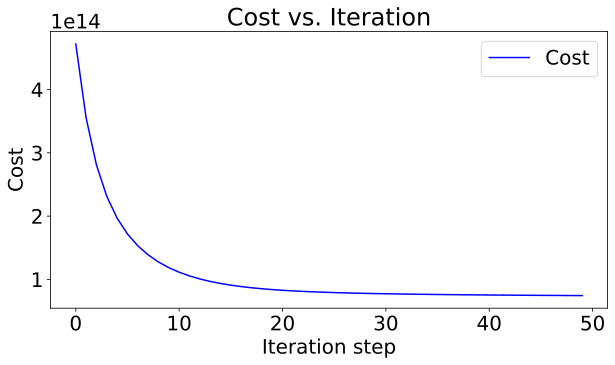

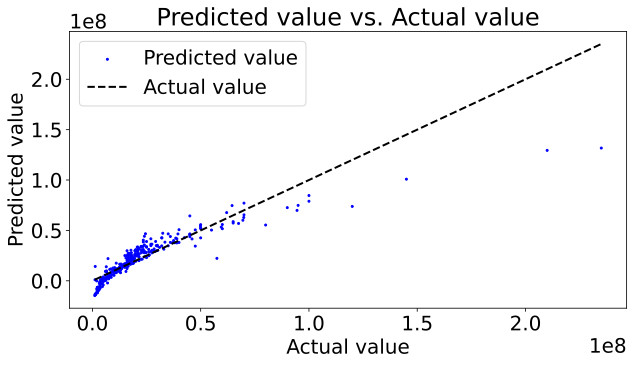

In [27]:
# 设置字体大小
plt.rcParams['font.size'] = 20  # 设置全局字体大小

# 可视化损失函数随迭代次数的变化
plt.figure(figsize=(10, 5))
plt.plot(range(num_iterations), cost_history, 'b-', label='Cost')
plt.xlabel('Iteration step')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
plt.legend()
plt.show()

# 可视化预测值与实际值的对比(使用测试集)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, test_predictions, c='blue', marker='o', s=4, label='Predicted value')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual value')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Predicted value vs. Actual value')
plt.legend()
plt.show()